In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy import signal
import h5py, time
import sys
from iminuit import Minuit, describe
from pprint import pprint # we use this to pretty print some stuff later


In [5]:
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile

In [6]:
fname = r"/data/new_trap/20190715/NoBead/X350_Y200.h5"  # load a test data file 
bd = BeadDataFile.BeadDataFile(fname)
time = np.arange(0,len(bd.quad_sum)-1,1) # make time for the entire data set
time_sub = np.arange(3501,4000) # make time for a subset, for cross check

Error loading spinning data


In [7]:
check = [] # list for the P(t+1)-P(t)
subset = [] # for the subset cross check
for i in range(0,len(bd.quad_sum)-1): # loop through the data set and calculate
    check.append(bd.quad_sum[i+1]-bd.quad_sum[i])
    if(i>3500 and i<4000): # the first peak extracted
        subset.append(bd.quad_sum[i+1]-bd.quad_sum[i])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in int_scalars
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in int_scalars
  


# EXAMPLE 1: Specific

# definition of a gaussian
def gaussian(x,area,mean,sigma,constant):
    norm = (1/((1/2*sigma)*np.sqrt(np.pi * 2)))
    return area * norm * np.exp(-(np.subtract(x,mean)**2/(2*sigma**2)))+constant

# definition of the cost function to minimize, examplary chisquare
def chisquare_1d(area,mean,sigma,constant):
    return np.sum(np.power(np.divide(np.subtract(gaussian(data_x,area,mean,sigma,constant),data_y),data_y_error),2))



In [63]:
# EXAMPLE 2: Generic 

def gaussian(x,params=list):
    norm = (1/((1/2*params[2])*np.sqrt(np.pi * 2)))
    return params[0] * norm * np.exp(-(np.subtract(x,params[1])**2/(2*params[2]**2)))+params[3]

def chisquare_1d(function, functionparams, data_x, data_y,data_y_error):
    chisquarevalue=np.sum(np.power(np.divide(np.subtract(function(data_x,functionparams),data_y),data_y_error),2))
    ndf = len(data_y)-len(functionparams)
    #print(ndf)
    return (chisquarevalue, ndf)

def chisquare_gaussian(area,mean,sigma,constant):
    return chisquare_1d(function=gaussian,functionparams=[area,mean,sigma,constant],data_x=data_x,data_y=data_y,data_y_error=data_y_error)[0]

def ndf_gaussian():
    return chisquare_1d(function=gaussian,functionparams=[area,mean,sigma,constant],data_x=data_x,data_y=data_y,data_y_error=data_y_error)[1]


In [75]:
data_x = time # give x data
data_y = check # give y data 
data_y_error = np.sqrt(np.abs(check)) # give y uncertainty

In [76]:
area=0
mean=0
sigma=0
constant=0

m=Minuit(chisquare_gaussian, 
         area = 410e7, # set start parameter
         #limit_area= (limit_lower,limit_upper) # if you want to limit things
         #fix_area = "True", # you can also fix it
         mean = 3650,
         #fix_mean = "True",
         limit_mean = (3500,4500),
         sigma = 150,
         constant = 0,
         #fix_constant=0,
         errordef = 1,
         print_level=1)
print('Now proceed with the fit.')
m.migrad(ncall=500000)
print()
#m.minos(), if you need fancy mapping
chisquare=m.fval
print(chisquare)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: InitialParamWarning: Parameter area is floating but does not have initial step size. Assume 1.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: InitialParamWarning: Parameter mean is floating but does not have initial step size. Assume 1.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: InitialParamWarning: Parameter sigma is floating but does not have initial step size. Assume 1.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: InitialParamWarning: Parameter constant is floating but does not have initial step size. Assume 1.


Now proceed with the fit.
------------------------------------------------------------------
| FCN = 6.797E+10               |     Ncalls=727 (727 total)     |
| EDM = 0.00341 (Goal: 1E-05)   |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------

67972356091.102005


(3500, 4000)

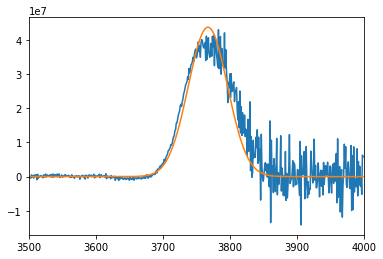

In [59]:
plt.plot(time_sub,subset)
plt.plot(time_sub,gaussian(time_sub,params=[m.values["area"],m.values["mean"],m.values["sigma"],m.values["constant"]]))
plt.xlim(3500,4000)

(3500, 4000)

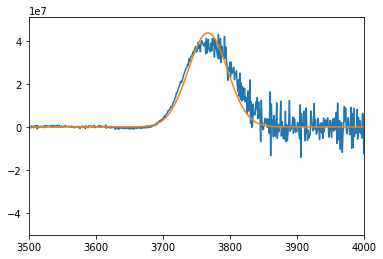

In [60]:
plt.plot(time,check)
plt.plot(time,gaussian(time,params=[m.values["area"],m.values["mean"],m.values["sigma"],m.values["constant"]]))
plt.xlim(3500,4000)

24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995


/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for mean=3767.279097
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for mean=3767.279151
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for mean=3767.279206
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for mean=3767.279260
  """Entry point for launching an IPython kernel.


24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995


/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for mean=3767.279314
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for mean=3767.279369
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for mean=3767.279423
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for mean=3767.279477
  """Entry point for launching an IPython kernel.


24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995


/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for mean=3767.279531
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: Migrad fails to converge for mean=3767.279586
  """Entry point for launching an IPython kernel.


24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
2499

24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
2499

24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995
24995


(array([3767.27964008, 3767.27969439, 3767.2797487 , 3767.27980301,
        3767.27985732, 3767.27991163, 3767.27996595, 3767.28002026,
        3767.28007457, 3767.28012888, 3767.28018319, 3767.2802375 ,
        3767.28029181, 3767.28034612, 3767.28040044, 3767.28045475,
        3767.28050906, 3767.28056337, 3767.28061768, 3767.28067199,
        3767.2807263 , 3767.28078061, 3767.28083492, 3767.28088924,
        3767.28094355, 3767.28099786, 3767.28105217, 3767.28110648,
        3767.28116079, 3767.2812151 , 3767.28126941, 3767.28132372,
        3767.28137804, 3767.28143235, 3767.28148666, 3767.28154097,
        3767.28159528, 3767.28164959, 3767.2817039 , 3767.28175821,
        3767.28181253, 3767.28186684, 3767.28192115, 3767.28197546,
        3767.28202977, 3767.28208408, 3767.28213839, 3767.2821927 ,
        3767.28224701, 3767.28230133, 3767.28235564, 3767.28240995,
        3767.28246426, 3767.28251857, 3767.28257288, 3767.28262719,
        3767.2826815 , 3767.28273581, 3767.28279

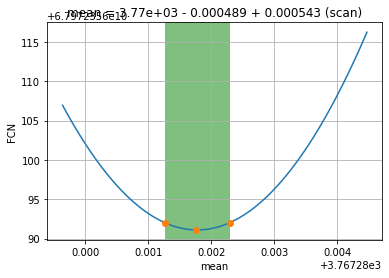

In [61]:
m.draw_mnprofile('mean',bound = 5, bins = 100)